Target: enable the particular company to promote their products with advertisment in specific bike location

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# data understanding

In [2]:
nyc = pd.read_csv('CitiBike.csv')
nyc.head(4)

,tripduration,start month,start hour,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,839,1,0:09,1/1/2016 00:23:54,532,S 5 Pl & S 4 St,40.710451,-73.960876,401,Allen St & Rivington St,40.720196,-73.989978,17109,Customer,NaN,0
1,686,1,0:21,1/1/2016 00:32:44,3143,5 Ave & E 78 St,40.776829,-73.963888,3132,E 59 St & Madison Ave,40.763505,-73.971092,23514,Subscriber,1960.0,1
2,315,1,0:33,1/1/2016 00:38:26,3164,Columbus Ave & W 72 St,40.777057,-73.978985,3178,Riverside Dr & W 78 St,40.784145,-73.983625,14536,Subscriber,1971.0,1
3,739,1,0:40,1/1/2016 00:53:11,223,W 13 St & 7 Ave,40.737815,-73.999947,276,Duane St & Greenwich St,40.717488,-74.010455,24062,Subscriber,1969.0,1


the range of each arributes
tripduration : 61-2363758
starttime : 1/1/2016 00:09:55 - 12/31/2016 23:53:42
stoptime : 1/1/2016 00:23:54 - 01/01/2017 00:14:41
start station id, end station id : 72-3440
start station name, end station name : variables characters
start station latitude : 40.44535 - 40.804213
start station longitude : -74.01713445 - -73.92989109999999
end station latitude : 0 - 40.804213
end station longitude : -74 - 0
bikeid : 14529 - 27327
user type : subscriber / customer
birth year : ‘NaN’& 1885-2000
gender : 0 - 2

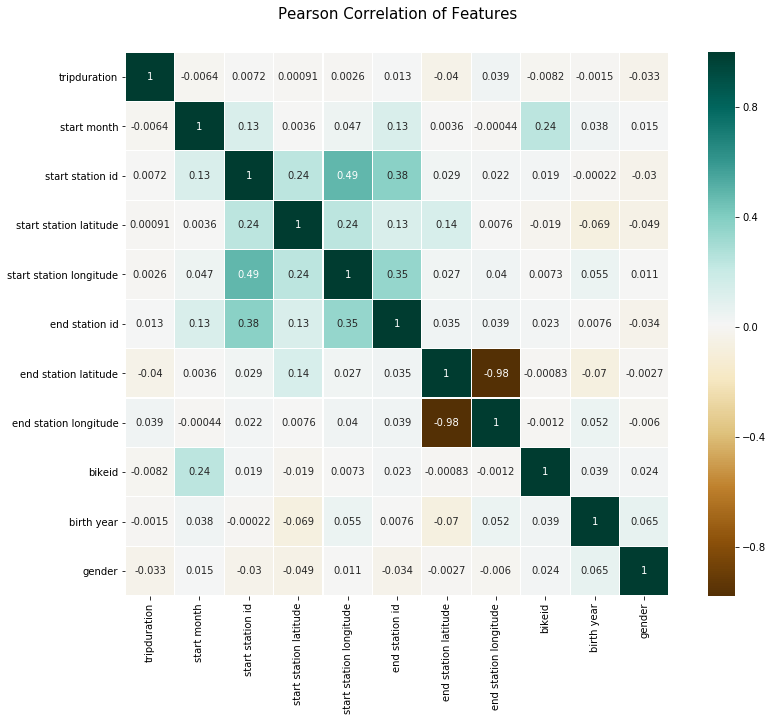

In [3]:
undernyc = nyc.copy()
undernyc = undernyc.drop(['start hour','stoptime', 'start station name','end station name', 'usertype'], axis =1)
plt.figure(figsize=(14,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(undernyc.astype(float).corr(), cmap = "BrBG",
linewidths=0.1, square=True, linecolor='white',
annot=True)
plt.savefig('var_corr.png')

# Data preparation 

In [4]:
nyc_1 = nyc[nyc['usertype']!= 'Customer']
nyc_filtered = nyc_1[nyc_1['gender']!=0]

In [5]:
nyc_filtered = nyc_filtered.drop(['start station id','end station id','bikeid'], axis =1)

In [6]:
nyc_filtered = nyc_filtered.drop(['tripduration', 'stoptime'],axis =1)

In [7]:
start=nyc_filtered.groupby('start station name', as_index=False).agg({"end station name": "count"})
start.rename(columns={'start station name':'station name',
                          'end station name':'start fre'}, 
                 inplace=True)

In [8]:
end=nyc_filtered.groupby('end station name', as_index=False).agg({"start station name": "count"})
end.rename(columns={'end station name':'station name',
                          'start station name':'end fre'}, 
                 inplace=True)

In [9]:
data3=pd.merge(start, end)
data3.head()

,station name,start fre,end fre
0,1 Ave & E 15 St,567,513
1,1 Ave & E 16 St,479,491
2,1 Ave & E 18 St,797,758
3,1 Ave & E 30 St,870,847
4,1 Ave & E 44 St,498,518


In [10]:
month=nyc_filtered.groupby(['start station name','start month']).size()
month=month.groupby(['start station name']).idxmax()
location=[]
monfre=[]
for x, y in month:
    location.append(x)
    monfre.append(y)
mon=pd.DataFrame({'station name':location, 'frequent month': monfre})
data5=pd.merge(data3, mon)
data5.head()

,station name,start fre,end fre,frequent month
0,1 Ave & E 15 St,567,513,5
1,1 Ave & E 16 St,479,491,8
2,1 Ave & E 18 St,797,758,11
3,1 Ave & E 30 St,870,847,8
4,1 Ave & E 44 St,498,518,7


In [11]:
new = nyc_filtered["start hour"].str.split(":", n = 1, expand = True) 
nyc_filtered["hour"]= new[0] 

In [12]:
hour=nyc_filtered.groupby(['start station name','hour']).size()
hour=hour.groupby(['start station name']).idxmax()
location=[]
houfre=[]
for x, y in hour:
    location.append(x)
    houfre.append(y)
hou=pd.DataFrame({'station name':location, 'frequent hour': houfre})
data6=pd.merge(data5, hou)
data6.head()

,station name,start fre,end fre,frequent month,frequent hour
0,1 Ave & E 15 St,567,513,5,8
1,1 Ave & E 16 St,479,491,8,8
2,1 Ave & E 18 St,797,758,11,8
3,1 Ave & E 30 St,870,847,8,8
4,1 Ave & E 44 St,498,518,7,17


In [13]:
gend=nyc_filtered.groupby(['start station name','gender']).size().reset_index(name='counts')
gend.rename(columns={ 'start station name':'station name','gender':'gender','counts':'counts' },inplace=True)
cgend= gend.copy()
cgend.rename(columns={ 'station name':'station name','gender':'gender1','counts':'counts1' },inplace=True)
man=cgend[cgend['gender1']==1]
woman =gend[gend['gender']==2]
gendrat = pd.merge(man, woman)
gendrat['gendra'] = gendrat['counts']/gendrat['counts1']
gendrat = gendrat.drop(['gender1','counts1','gender','counts'], axis =1)
data7=pd.merge(data6, gendrat)

In [14]:
nyc_filtered["age"]=2016-nyc_filtered["birth year"]
age=nyc_filtered.groupby('start station name', as_index=False).agg({"age": "mean"})
age.rename(columns={'start station name':'station name',
                          'age':'age'}, 
                 inplace=True)
age['age']=round(age["age"])
dataTrans = pd.merge(data7, age)
dataTrans.head()

,station name,start fre,end fre,frequent month,frequent hour,gendra,age
0,1 Ave & E 15 St,567,513,5,8,0.379562,37.0
1,1 Ave & E 16 St,479,491,8,8,0.425595,36.0
2,1 Ave & E 18 St,797,758,11,8,0.367067,35.0
3,1 Ave & E 30 St,870,847,8,8,0.344668,38.0
4,1 Ave & E 44 St,498,518,7,17,0.245000,43.0


# cluster model

In [15]:
from sklearn.cluster import KMeans
trainData = dataTrans.copy()
trainData= trainData.drop(['station name'], axis =1)
clu = KMeans(n_clusters = 3)
clu.fit(trainData)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

分數: [0.6667482169029869, 0.6291449391917326, 0.6375147532312465, 0.6031188252336998, 0.6037572707358089, 0.5672823988535983]
K 值: [2, 3, 4, 5, 6, 7]


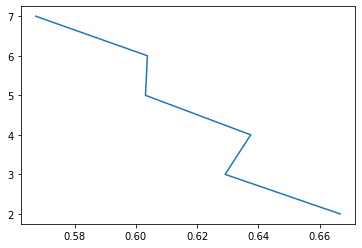

In [16]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
%matplotlib inline

scores = []
ks = []

for i in range(2,8):
 clu = KMeans(n_clusters = i)
 clu.fit(trainData)
 clu_score = silhouette_score(trainData, clu.labels_)
 scores.append(clu_score)
 ks.append(i)
print("分數:", scores)
print("K 值:", ks)
plt.plot(scores, ks)

plt.savefig('plot.png')

In [17]:
clu = KMeans(n_clusters = 4)
clu.fit(trainData)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
dataTrans['label']=clu.labels_
dataTrans.head()

,station name,start fre,end fre,frequent month,frequent hour,gendra,age,label
0,1 Ave & E 15 St,567,513,5,8,0.379562,37.0,3
1,1 Ave & E 16 St,479,491,8,8,0.425595,36.0,3
2,1 Ave & E 18 St,797,758,11,8,0.367067,35.0,1
3,1 Ave & E 30 St,870,847,8,8,0.344668,38.0,1
4,1 Ave & E 44 St,498,518,7,17,0.245000,43.0,3


In [19]:
station=nyc_filtered.copy()
station = station.drop_duplicates(['start station name'],keep='last')
#station=station.reset_index()
#station = station.drop(['index'], axis =1)
station

,start month,start hour,start station name,start station latitude,start station longitude,end station name,end station latitude,end station longitude,usertype,birth year,gender,hour,age
797,1,19:43,E 40 St & Madison Ave,40.751594,-73.980432,W 24 St & 7 Ave,40.744876,-73.995299,Subscriber,1988.0,1,19,28.0
15649,2,6:51,W 29 St & 9 Ave,40.750073,-73.998393,W 21 St & 6 Ave,40.741740,-73.994156,Subscriber,1965.0,1,6,51.0
19603,2,9:17,PABT Valet,40.758985,-73.993800,W 46 St & 11 Ave,40.763414,-73.996674,Subscriber,1989.0,2,9,27.0
20911,2,8:41,Allen St & E Houston St,40.722055,-73.989111,W 27 St & 7 Ave,40.746647,-73.993915,Subscriber,1985.0,1,8,31.0
25540,3,13:16,Cadman Plaza West & Montague St,40.693830,-73.990539,Schermerhorn St & Court St,40.691029,-73.991834,Subscriber,1987.0,1,13,29.0
37511,3,14:52,KentAve&N7 St,40.720577,-73.961502,KentAve&N7 St,40.720577,-73.961502,Subscriber,1964.0,1,14,52.0
40948,4,11:24,Marcy Ave & MacDonough St,40.680618,-73.946249,Fulton St & Grand Ave,40.682232,-73.961458,Subscriber,1952.0,2,11,64.0
54508,4,19:36,10 Ave & W 28 St,40.750664,-74.001768,W 43 St & 10 Ave,40.760094,-73.994618,Subscriber,1979.0,1,19,37.0
64703,5,9:42,N Henry St & Richardson St,40.719216,-73.942447,Meserole Ave & Manhattan Ave,40.727086,-73.952991,Subscriber,1971.0,2,9,45.0
71230,5,19:11,8 Ave & W 31 St N,40.750967,-73.994442,E 14 St & Avenue B,40.729387,-73.977724,Subscriber,1989.0,1,19,27.0


In [20]:
station = station.drop(['start month', 'start hour','end station name',
                        'end station latitude','end station longitude',
                        'usertype','birth year','gender','hour','age'], axis =1)
station.rename(columns={'start station name':'station name',
                          'start station latitude':'station latitude',
                         'start station longitude':'station longitude'}, 
                inplace=True)
station

,station name,station latitude,station longitude
797,E 40 St & Madison Ave,40.751594,-73.980432
15649,W 29 St & 9 Ave,40.750073,-73.998393
19603,PABT Valet,40.758985,-73.993800
20911,Allen St & E Houston St,40.722055,-73.989111
25540,Cadman Plaza West & Montague St,40.693830,-73.990539
37511,KentAve&N7 St,40.720577,-73.961502
40948,Marcy Ave & MacDonough St,40.680618,-73.946249
54508,10 Ave & W 28 St,40.750664,-74.001768
64703,N Henry St & Richardson St,40.719216,-73.942447
71230,8 Ave & W 31 St N,40.750967,-73.994442


In [21]:
anadata=pd.merge(dataTrans, station)
anadata

,station name,start fre,end fre,frequent month,frequent hour,gendra,age,label,station latitude,station longitude
0,1 Ave & E 15 St,567,513,5,8,0.379562,37.0,3,40.732219,-73.981656
1,1 Ave & E 16 St,479,491,8,8,0.425595,36.0,3,40.732219,-73.981656
2,1 Ave & E 18 St,797,758,11,8,0.367067,35.0,1,40.733812,-73.980544
3,1 Ave & E 30 St,870,847,8,8,0.344668,38.0,1,40.741444,-73.975361
4,1 Ave & E 44 St,498,518,7,17,0.245000,43.0,3,40.750020,-73.969053
5,1 Ave & E 62 St,649,610,8,18,0.305835,37.0,3,40.761227,-73.960940
6,1 Ave & E 68 St,1198,1109,10,8,0.305011,38.0,1,40.765005,-73.958185
7,1 Ave & E 78 St,768,707,8,8,0.376344,38.0,1,40.771404,-73.953517
8,1 Ave & E 94 St,98,116,10,8,0.166667,37.0,0,40.781721,-73.945940
9,1 Pl & Clinton St,39,39,10,9,0.695652,41.0,0,40.680959,-73.999057


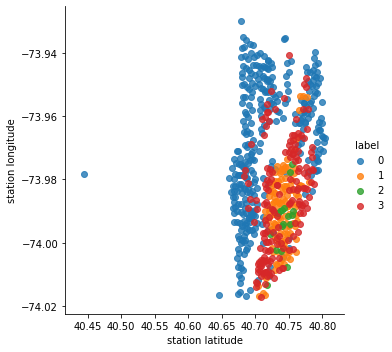

In [22]:
facet = sns.lmplot(data=anadata, x='station latitude', y='station longitude', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)
#centers = clu.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
facet.savefig("group.png")

# Data Observation

In [23]:
group = anadata.copy()
Onegroup = group[group['label']==0]
Twogroup = group[group['label']==1]
Threegroup = group[group['label']==2]
Fourgroup = group[group['label']==3]

## start fre 

In [24]:
{Onegroup['start fre'].min(), Onegroup['start fre'].max()}

{2, 280}

In [25]:
{Twogroup['start fre'].min(), Twogroup['start fre'].max()}

{657, 1223}

In [26]:
{Threegroup['start fre'].min(), Threegroup['start fre'].max()}
#Threegroup['start fre'].mean()

{1294, 2778}

In [27]:
{Fourgroup['start fre'].min(), Fourgroup['start fre'].max()}
#Fourgroup['start fre'].mean()

{284, 823}

## age 

In [28]:
{Onegroup['age'].min(), Onegroup['age'].max()}

{30.0, 50.0}

In [29]:
{Twogroup['age'].min(), Twogroup['age'].max()}

{34.0, 43.0}

In [30]:
{Threegroup['age'].min(), Threegroup['age'].max()}

{37.0, 41.0}

In [31]:
{Fourgroup['age'].min(), Fourgroup['age'].max()}

{33.0, 44.0}

## frequent hour 

In [32]:
dataforhour = Onegroup.groupby(['frequent hour']).size()
dataforhour

frequent hour
10      7
11      8
12      5
13      7
14      7
15     12
16     17
17     33
18     45
19     15
20      5
21      1
22      1
23      1
6       1
7      17
8     123
9      30
dtype: int64

In [33]:
dataforhour = Twogroup.groupby(['frequent hour']).size()
dataforhour

frequent hour
12     1
16     1
17    31
18    42
6      1
7      1
8     37
9      5
dtype: int64

In [34]:
dataforhour = Threegroup.groupby(['frequent hour']).size()
dataforhour

frequent hour
17     5
18    12
dtype: int64

In [35]:
dataforhour = Fourgroup.groupby(['frequent hour']).size()
dataforhour

frequent hour
16     5
17    58
18    43
19     3
7      5
8     47
9      4
dtype: int64

## Classification

In [63]:
dataforgroup = anadata.copy()
for i in range(len(dataforgroup['start fre'])):
    if dataforgroup['start fre'][i] in range(657,824):
        dataforgroup['label'][i]=3
dataforgroup.head()

D:\pythonprogram\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,station name,start fre,end fre,frequent month,frequent hour,gendra,age,label,station latitude,station longitude
0,1 Ave & E 15 St,567,513,5,8,0.379562,37.0,3,40.732219,-73.981656
1,1 Ave & E 16 St,479,491,8,8,0.425595,36.0,3,40.732219,-73.981656
2,1 Ave & E 18 St,797,758,11,8,0.367067,35.0,3,40.733812,-73.980544
3,1 Ave & E 30 St,870,847,8,8,0.344668,38.0,1,40.741444,-73.975361
4,1 Ave & E 44 St,498,518,7,17,0.245000,43.0,3,40.750020,-73.969053


In [37]:
Onegroup = dataforgroup[dataforgroup['label']==0]
Twogroup = dataforgroup[dataforgroup['label']==1]
Threegroup = dataforgroup[dataforgroup['label']==2]
Fourgroup = dataforgroup[dataforgroup['label']==3]

### start fre

In [38]:
{Onegroup['start fre'].min(), Onegroup['start fre'].max()}

{2, 280}

In [39]:
{Twogroup['start fre'].min(), Twogroup['start fre'].max()}

{837, 1223}

In [40]:
{Threegroup['start fre'].min(), Threegroup['start fre'].max()}

{1294, 2778}

In [41]:
{Fourgroup['start fre'].min(), Fourgroup['start fre'].max()}

{284, 823}

### age

In [42]:
{Onegroup['age'].min(), Onegroup['age'].max()}

{30.0, 50.0}

In [43]:
{Twogroup['age'].min(), Twogroup['age'].max()}

{34.0, 43.0}

In [44]:
{Threegroup['age'].min(), Threegroup['age'].max()}

{37.0, 41.0}

In [45]:
{Fourgroup['age'].min(), Fourgroup['age'].max()}

{33.0, 44.0}

### frequent hour

In [46]:
dataforhour = Onegroup.groupby(['frequent hour']).size()
dataforhour

frequent hour
10      7
11      8
12      5
13      7
14      7
15     12
16     17
17     33
18     45
19     15
20      5
21      1
22      1
23      1
6       1
7      17
8     123
9      30
dtype: int64

In [47]:
dataforhour = Twogroup.groupby(['frequent hour']).size()
dataforhour

frequent hour
12     1
17    21
18    29
6      1
8     21
9      1
dtype: int64

In [48]:
dataforhour = Threegroup.groupby(['frequent hour']).size()
dataforhour

frequent hour
17     5
18    12
dtype: int64

In [49]:
dataforhour = Fourgroup.groupby(['frequent hour']).size()
dataforhour

frequent hour
16     6
17    68
18    56
19     3
7      6
8     63
9      8
dtype: int64

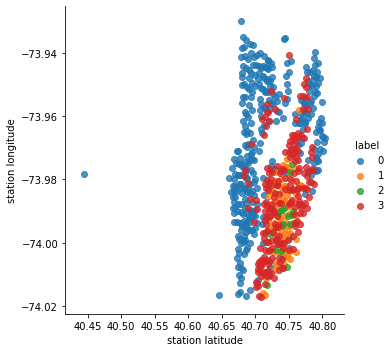

In [50]:
fig = sns.lmplot(data=dataforgroup, x='station latitude', y='station longitude', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)
fig.savefig("afterclass.png")

# Decision tree

In [51]:
from sklearn.model_selection import train_test_split
featureVector=["station latitude", "station longitude",
                "start fre","end fre", "frequent month",
               "frequent hour","gendra", "age"]
data_train, data_test, target_train, target_test = train_test_split(dataforgroup[featureVector], 
                                 dataforgroup["label"], test_size=0.4,
                                 random_state=0)



In [52]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth = 2)
clf = clf.fit(data_train, target_train)

In [53]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=["station latitude", 
                                          "station longitude", 
                                           "start fre","end fre", 
                                          "frequent month", "frequent hour",
                                          "gendra", "age"],  
                          class_names="label", 
                          filled=True, rounded=True,
                          special_characters=True)
graph = graphviz.Source(dot_data)
graph
graph.render("aftercluster")

'aftercluster.pdf'

In [54]:
from sklearn.metrics import accuracy_score
trainpred = clf.predict(data_train)
testpred = clf.predict(data_test)
print("Train Accuracy: ", accuracy_score(target_train, trainpred) * 100, "%")
print("Test Accuracy: ", accuracy_score(target_test, testpred) * 100, "%")

Train Accuracy:  96.8503937007874 %
Test Accuracy:  97.6470588235294 %


depth: 1 	Train Accuracy:  87.4015748031496 % 	Test Accuracy:  82.74509803921568 %
depth: 2 	Train Accuracy:  96.8503937007874 % 	Test Accuracy:  97.6470588235294 %
depth: 3 	Train Accuracy:  100.0 % 	Test Accuracy:  99.6078431372549 %
depth: 4 	Train Accuracy:  100.0 % 	Test Accuracy:  99.6078431372549 %
depth: 5 	Train Accuracy:  100.0 % 	Test Accuracy:  98.82352941176471 %
depth: 6 	Train Accuracy:  100.0 % 	Test Accuracy:  99.6078431372549 %


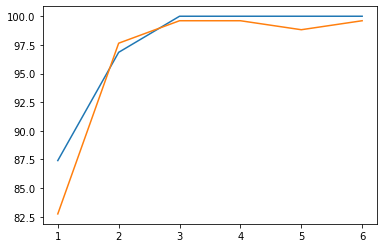

In [55]:
depths =[]
tra =[]
tes =[]
for depth in (range(1,7)):
    clf=DecisionTreeClassifier(max_depth=depth)
    clf=clf.fit(data_train, target_train)
    trainpred = clf.predict(data_train)
    testpred = clf.predict(data_test)
    print ("depth:",depth,
           "\tTrain Accuracy: ", accuracy_score(target_train, trainpred) * 100, "%",
           "\tTest Accuracy: ",accuracy_score(target_test, testpred) * 100, "%")
    depths.append((depth))
    tra.append(accuracy_score(target_train, trainpred) * 100 )
    tes.append(accuracy_score(target_test, testpred) * 100 )
plt.plot(depths, tra,depths, tes) 
#plt.savefig('plot.pdf')

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

y=dataforgroup["label"]
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# shuffle and split training and test sets
featureVector=["station latitude", "station longitude",
               "start fre", "end fre", "frequent month",
               "frequent hour","gendra", "age"]
data_train, data_test, target_train, target_test = train_test_split(dataforgroup[featureVector], 
                                 y, test_size=0.4,
                                 random_state=0)

# Learn to predict each class against the other
classifier = DecisionTreeClassifier(criterion="entropy", max_depth = 1)
y_score = clf.fit(data_train, target_train).predict(data_test)


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(target_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(target_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

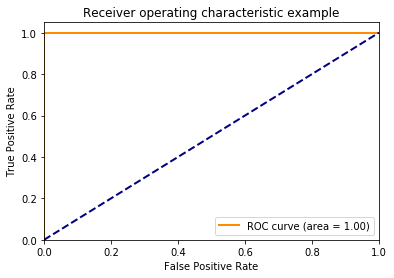

In [65]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# evaluation 

In [66]:
from sklearn.model_selection import train_test_split
dataforgroup= dataforgroup.drop(['station name','label'], axis =1)
dataforgroup.head()

,start fre,end fre,frequent month,frequent hour,gendra,age,station latitude,station longitude
0,567,513,5,8,0.379562,37.0,40.732219,-73.981656
1,479,491,8,8,0.425595,36.0,40.732219,-73.981656
2,797,758,11,8,0.367067,35.0,40.733812,-73.980544
3,870,847,8,8,0.344668,38.0,40.741444,-73.975361
4,498,518,7,17,0.245000,43.0,40.750020,-73.969053


In [67]:
from sklearn import preprocessing
min_max_scaler=preprocessing.MinMaxScaler()
data=pd.DataFrame(min_max_scaler.fit_transform(dataforgroup)) #make the data range between 0 and 1
data.columns=dataforgroup.columns
data.head()

,start fre,end fre,frequent month,frequent hour,gendra,age,station latitude,station longitude
0,0.203530,0.181721,0.363636,0.117647,0.195316,0.35,0.799382,0.406666
1,0.171830,0.173898,0.636364,0.117647,0.225667,0.30,0.799382,0.406666
2,0.286383,0.268848,0.909091,0.117647,0.187077,0.25,0.803823,0.419404
3,0.312680,0.300498,0.636364,0.117647,0.172308,0.40,0.825089,0.478817
4,0.178674,0.183499,0.545455,0.647059,0.106593,0.65,0.848987,0.551119


In [68]:
featureVector=["end fre", "frequent month",
               "frequent hour","gendra", "age"]
data_train, data_test, target_train, target_test = train_test_split(dataforgroup[featureVector], 
                                 dataforgroup["start fre"], test_size=0.4,
                                 random_state=0)

In [69]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(random_state = 0, max_depth = 4)
clf = clf.fit(data_train, target_train)

In [60]:
from sklearn.tree import export_graphviz
import graphviz
dot_data1 = export_graphviz(clf, out_file=None,
                           feature_names=["end fre", 
                                          "frequent month", "frequent hour",
                                          "gendra", "age"],  
                          class_names="start fre", 
                          filled=True, rounded=True,
                          special_characters=True)
graph1 = graphviz.Source(dot_data1)
graph1
graph1.render("decitiontree")

'decitiontree.pdf'

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

#y=dataforgroup["label"]
# Binarize the output
#y = label_binarize(y, classes=[0, 1, 2])
#n_classes = y.shape[1]

# shuffle and split training and test sets
featureVector=["end fre", "frequent month",
               "frequent hour","gendra", "age"]
data_train, data_test, target_train, target_test = train_test_split(dataforgroup[featureVector], 
                                 dataforgroup["start fre"], test_size=0.4,
                                 random_state=0)

# Learn to predict each class against the other
clf = DecisionTreeRegressor(random_state = 0, max_depth = 4)
clf = clf.fit(data_train, target_train).predict(data_test)




# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(dataforgroup["start fre"])):
    fpr[i], tpr[i], _ = roc_curve(target_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(target_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

ValueError: Can only tuple-index with a MultiIndex

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
evaludata = nyc.copy()
#age = evaludata.groupby(['age']).count()
evaludata["age"]=2016-evaludata["birth year"]
sum = 0
for n in evaludata['age']:
    if n==35 or n==36 or n==37 or n==38 or n==39 or n==40 or n==41:
        sum=sum+1
sum/len(evaludata['age'])

In [ ]:
aevaludata = anadata.copy()
aevaludata = aevaludata[aevaludata['label']==0]
aevaludata
sum2 =0
for n in aevaludata['station name']:
    for i, s in enumerate(evaludata['start station name']):
        if n==s:
            if evaludata['age'][i]==35 or evaludata['age'][i]==36 or evaludata['age'][i]==37 or evaludata['age'][i]==38 or evaludata['age'][i]==39 or evaludata['age'][i]==40 or evaludata['age'][i]==41:
                sum2 = sum2+1
sum2/sum        

In [ ]:
aevaludata = anadata.copy()
aevaludata = aevaludata[aevaludata['label']==1]
aevaludata
sum3 =0
for n in aevaludata['station name']:
    for i, s in enumerate(evaludata['start station name']):
        if n==s:
            if evaludata['age'][i]==35 or evaludata['age'][i]==36 or evaludata['age'][i]==37 or evaludata['age'][i]==38 or evaludata['age'][i]==39 or evaludata['age'][i]==40 or evaludata['age'][i]==41:
                sum3 = sum3+1
sum3/sum     

In [ ]:
aevaludata = anadata.copy()
aevaludata = aevaludata[aevaludata['label']==2]
aevaludata
sum4 =0
for n in aevaludata['station name']:
    for i, s in enumerate(evaludata['start station name']):
        if n==s:
            if evaludata['age'][i]==35 or evaludata['age'][i]==36 or evaludata['age'][i]==37 or evaludata['age'][i]==38 or evaludata['age'][i]==39 or evaludata['age'][i]==40 or evaludata['age'][i]==41:
                sum4 = sum4+1
sum4/sum    

In [ ]:
aevaludata = anadata.copy()
aevaludata = aevaludata[aevaludata['label']==3]
aevaludata
sum5 =0
for n in aevaludata['station name']:
    for i, s in enumerate(evaludata['start station name']):
        if n==s:
            if evaludata['age'][i]==35 or evaludata['age'][i]==36 or evaludata['age'][i]==37 or evaludata['age'][i]==38 or evaludata['age'][i]==39 or evaludata['age'][i]==40 or evaludata['age'][i]==41:
                sum5 = sum5+1
sum5/sum    